<a href="https://colab.research.google.com/github/pedrocacioli8/AulasSirius/blob/main/Master_Semana2_Exercicios_ipynb_Pedro_Paulo_Cacioli_da_Silva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teste de Hipótese para a Média (uma variável)

### Atividade 1: Crie um dataframe a partir do banco de dados `basedosdados.br_inep_ideb.municipio` disponível em [Ideb](https://basedosdados.org/dataset/br-inep-ideb?bdm_table=municipio). Selecione apenas as colunas `ano`, `sigla_uf`, `taxa_aprovacao`, `nota_saeb_matematica`, `nota_saeb_lingua_portuguesa` e `ideb`.

In [ ]:
# seu código
import pandas as pd

In [ ]:
df_ideb = pd.read_csv("ideb (3).csv")

In [ ]:
df_ideb.head()

,Unnamed: 0,ano,sigla_uf,id_municipio,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao
0,0,2005,AC,1200054,municipal,fundamental,iniciais (1-5),64.1,0.645727,161.8,150.80,3.794003,2.4,NaN
1,1,2005,AC,1200302,municipal,fundamental,iniciais (1-5),53.9,0.561795,167.8,165.60,4.177761,2.3,NaN
2,2,2005,AC,1200328,estadual,fundamental,iniciais (1-5),49.3,0.501470,151.8,149.60,3.578558,1.8,NaN
3,3,2005,AC,1200328,municipal,fundamental,iniciais (1-5),48.8,0.494267,163.6,155.80,3.920963,1.9,NaN
4,4,2005,AC,1200328,publica,fundamental,iniciais (1-5),48.8,0.497858,159.0,153.39,3.785995,1.9,NaN


In [ ]:
# seu código
df_ideb1 = df_ideb.loc[:,["ano", "sigla_uf", "taxa_aprovacao", "nota_saeb_matematica", "nota_saeb_lingua_portuguesa", "ideb"]]

In [ ]:
df_ideb1.head()

,ano,sigla_uf,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
0,2005,AC,64.1,161.8,150.80,2.4
1,2005,AC,53.9,167.8,165.60,2.3
2,2005,AC,49.3,151.8,149.60,1.8
3,2005,AC,48.8,163.6,155.80,1.9
4,2005,AC,48.8,159.0,153.39,1.9


In [ ]:
# seu código

### Atividade 2: Verifique quantas linhas e colunas possui esse dataframe. Veja também se há dados faltantes.

In [ ]:
# seu código
print(f"o DataFrame possui {df_ideb1.shape[0]} linhas e {df_ideb1.shape[1]} colunas")

o DataFrame possui 130194 linhas e 6 colunas


In [ ]:
# seu código
df_ideb1.isna().sum()

ano                                0
sigla_uf                           0
taxa_aprovacao                 26736
nota_saeb_matematica           41849
nota_saeb_lingua_portuguesa    41849
ideb                           29825
dtype: int64

In [ ]:
# seu código
df_ideb1.shape

(130194, 6)

### Atividade 3: Teste a hipótese de a média da taxa de aprovação para o ano de 2005 ser igual a 78. Considere um nível de confiança de 95%.

Descreva, sucintamente, o resultado do teste de hipótese. Não esqueça de incluir as estatísticas encontradas.

Dica: crie um DataFrame somente com os valores do ano e da variável de interesse.


In [ ]:
# seu código
df_ideb2 = df_ideb1[df_ideb1["ano"]==2005]["taxa_aprovacao"].dropna()


In [ ]:
# seu código
df_ideb2.head()

0    64.1
1    53.9
2    49.3
3    48.8
4    48.8
Name: taxa_aprovacao, dtype: float64

In [ ]:
from scipy.stats import ttest_1samp

ttest_1samp(a=df_ideb2, popmean=78, alternative="two-sided")

TtestResult(statistic=20.890080427394643, pvalue=3.1469508067020596e-95, df=12082)

In [ ]:
from scipy.stats import ttest_1samp

In [ ]:
ttest_1samp(a=df_ideb2["taxa_aprovacao"], popmean=78, alternative="two-sided")

TtestResult(statistic=20.890080427394643, pvalue=3.1469508067020596e-95, df=12082)

In [ ]:
ttest_1samp(a=df_ideb2["taxa_aprovacao"], popmean=88.3307, alternative="two-sided")

TtestResult(statistic=-71.70125514152224, pvalue=0.0, df=12082)

**Como o p-valor é menor que o nível de significância, podemos rejeitar a hipótese nula, isto é, podemos afirmar com 95% de confiança que a média da taxa de aprovação do ano de 2005 é diferente de 78.**

**H0 = µ = 78**

**H1 = µ ≠ 78**

**α = 0,05**

# Teste de Hipótese para a Média (duas variáveis independentes)

Agora vamos aplicar um teste de hipótese para a média de duas populações independentes usando dados reais. Desejamos saber se a média para ambas é a mesma.

### Atividade 4: Teste a hipótese de a média do IDEB para os estados do Rio Grande do Sul e do Ceará, no ano de 2019, serem iguais. Considere um nível de confiança de 95%

Dica: Primeiro crie um dataframe auxiliar contendo apenas os dados referentes a 2019. Depois selecione dois conjunto de valores de IDEB, um apenas para o estado do Rio Grande do Sul e outro apenas para o estado do Ceará.

In [ ]:
# seu código
df_ideb3 = df_ideb[df_ideb['ano'] == 2019]

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
ttest_ind(df_ideb3['ideb'][df_ideb3['sigla_uf'] == 'CE'].dropna(),
          df_ideb3['ideb'][df_ideb3['sigla_uf'] == 'RS'].dropna(), equal_var=False)

Ttest_indResult(statistic=3.9541302761146584, pvalue=8.673400907588078e-05)

### Atividade 5: Com base no resultado do teste anterior, faça um boxplot que lhe ajude a entender melhor os resultados obtidos. Isto é, compare o boxplot do IDEB dos dois estados.

In [ ]:
# seu código
df_sigla = df_ideb3[(df_ideb3["sigla_uf"]=="CE") | (df_ideb3["sigla_uf"]=="RS")]



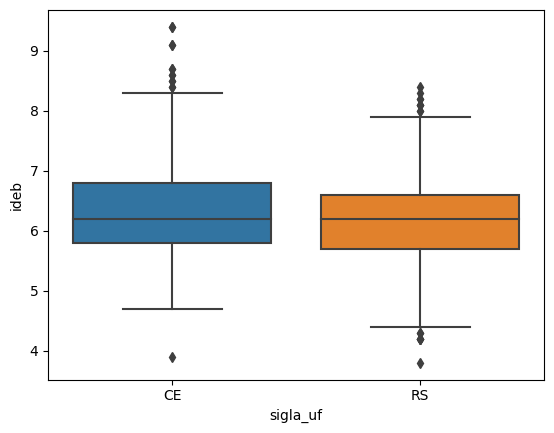

In [ ]:
import seaborn as sns
sns.boxplot(x=df_sigla["sigla_uf"], y=df_sigla["ideb"]);

### Atividade 6: Teste a hipótese de a média do IDEB para os anos de 2005 e 2019 serem iguais. Considere um nível de confiança de 95%

Dica: Crie dois dataframes auxiliares e selecione 300 linhas de cada um apenas (sem conter valores faltantes) para realizar o teste.

In [ ]:
# seu código
from scipy.stats import ttest_rel
df_2005 = df_ideb[df_ideb["ano"]==2005].iloc[:300, ].dropna()
df_2019 = df_ideb[df_ideb["ano"]==2019].iloc[:300, ].dropna()


In [ ]:
df_2005.head()

,Unnamed: 0,ano,sigla_uf,id_municipio,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao


In [ ]:
df_2019.head()

,Unnamed: 0,ano,sigla_uf,id_municipio,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao
3409,3409,2019,AC,1200104,estadual,fundamental,iniciais (1-5),98.2,0.980807,288.92,263.10,8.261611,8.1,5.3
3410,3410,2019,AL,2702306,municipal,fundamental,iniciais (1-5),99.6,0.995943,306.95,281.26,8.936068,8.9,5.1
3411,3411,2019,AL,2702306,publica,fundamental,iniciais (1-5),99.6,0.995943,306.95,281.26,8.936068,8.9,5.1
3412,3412,2019,AL,2703759,municipal,fundamental,iniciais (1-5),99.6,0.996759,284.67,261.05,8.143423,8.1,4.7
3413,3413,2019,AL,2703759,publica,fundamental,iniciais (1-5),99.6,0.996759,284.67,261.05,8.143423,8.1,4.7


### Atividade 7: Com base no resultado do teste anterior, faça um boxplot que lhe ajude a entender melhor os resultados obtidos. Isto é, compare o boxplot do IDEB para os dois anos.

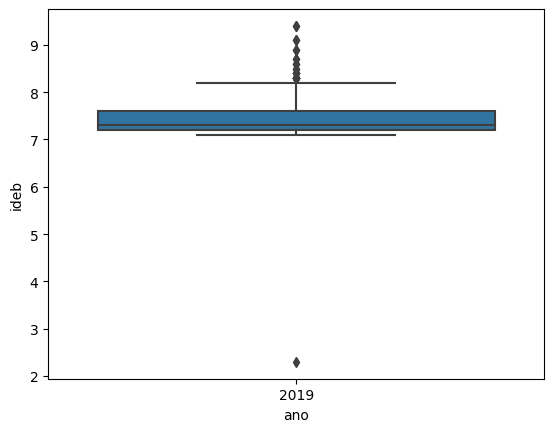

In [ ]:
# seu código
df_result = pd.concat([df_2005, df_2019])

sns.boxplot(x=df_result["ano"], y=df_result["ideb"]);

# Análise de Variância (ANOVA) One-Way

### Atividade 8: Vamos comparar a média do IDEB para os três estados da região sul, em 2019, para ver se estas médias podem ser consideradas iguais. Considere um nível de confiança de 95%.

Dica: Crie três dataframes auxiliares, um para cada estado.

In [ ]:
# seu código
df_ideb_2019_PR = df_ideb[df_ideb["sigla_uf"]=="PR"].dropna()
df_ideb_2019_SC = df_ideb[df_ideb["sigla_uf"]=="SC"].dropna()
df_ideb_2019_RS = df_ideb[df_ideb["sigla_uf"]=="RS"].dropna()

In [ ]:
# seu código
from scipy.stats import f_oneway

f_oneway(df_ideb_2019_PR["ideb"], df_ideb_2019_SC["ideb"], df_ideb_2019_RS["ideb"])

F_onewayResult(statistic=35.82130161587045, pvalue=3.025223438454416e-16)

### Atividade 9: Faça um boxplot para entender melhor o que está acontecendo com os valores do IDEB para os três estados.

In [ ]:
# seu código
df_result2 = pd.concat([df_ideb_2019_PR, df_ideb_2019_SC,df_ideb_2019_RS])

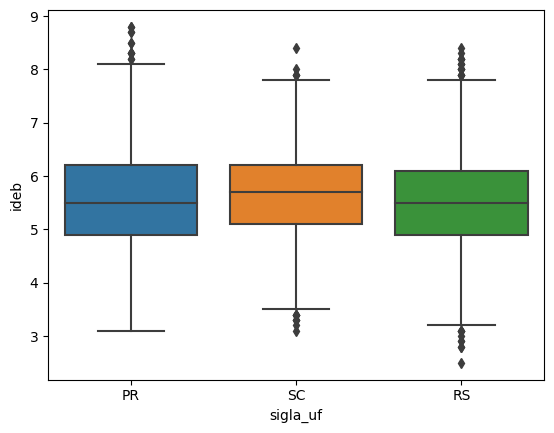

In [ ]:
sns.boxplot(x=df_result2["sigla_uf"], y=df_result2["ideb"]);

### Atividade 10: Faça um teste Post-hoc para verificar se de fato é o estado de Santa Catarina tem média diferente dos demais estados.

In [ ]:
# seu código
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
print(pairwise_tukeyhsd(endog=df_result2["ideb"], groups=df_result2["sigla_uf"], alpha= 0.05))

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
    PR     RS  -0.0414 0.035 -0.0805 -0.0023   True
    PR     SC   0.1039   0.0  0.0613  0.1464   True
    RS     SC   0.1453   0.0  0.1046  0.1859   True
---------------------------------------------------
